<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/hotelingT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://masamunetogetoge.com/hotelling-t2 で解説した手法を試してみるノート。<br>
https://github.com/msamunetogetoge/datas にあるDavisデータを使い、hoteling 理論による異常検知を試してみる。<br>
git clone してデータを取得し、カイ二乗統計量を計算させる。

# ホテリング理論(1次元)

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()


In [2]:
#データを取得し、データにどんな量が含まれるか確認する。
#体重と身長を測ったデータrepwt, repht は2回目に測定した値
# weight を使って異常検知を試してみる。
!git clone "https://github.com/msamunetogetoge/datas.git"
target_path = os.path.join( os.getcwd(), "datas/Davis.csv")
X=pd.read_csv(target_path)
X.head()

fatal: destination path 'datas' already exists and is not an empty directory.


,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


Text(0.5, 1.0, 'Davis Weight')

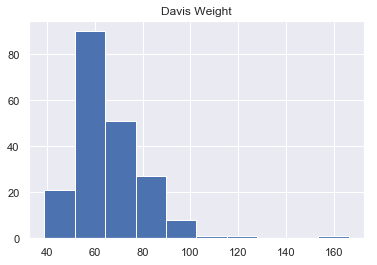

In [3]:
#グラフを描いて変なデータがあるか確認する。
x=X["weight"]
x.hist()
plt.title("Davis Weight")
#plt.savefig("davis.png")

In [4]:
#ホテリング統計量を計算するための関数作成
def hoteling_1dim(x):
    """ホテリング統計量a を計算する関数
    
    与えるデータx,平均μ, 分散σとして、 
    a= ((x-μ)/σ)^2で計算出来る

    Args:
        x : (N,1)型のnp.array

    Returns:
        a : データ毎のホテリング統計量
            (N,-)型のnp.array
    """
    mu = np.mean(x)
    N=len(x)
    sig =(np.sum( (x-mu)**2 ))/N
    sig = np.sqrt(sig)

    a = ( (x- mu)/sig )**2
    return a
    


In [5]:
#異常値かどうか見極めるための限界値を計算する
a_th =stats.chi2.ppf(q=0.95, df=1)

Text(0.5, 1.0, 'Anomaly Of Dates')

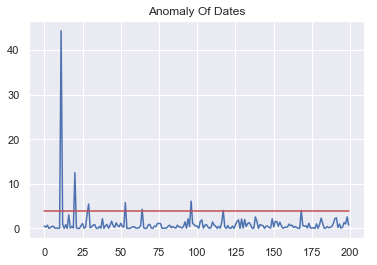

In [6]:
#定義した関数を使って、異常度をグラフに描画する
#赤線で異常度の限界線も描く
a = hoteling_1dim(x)
plt.plot(a)
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")

In [7]:
#異常値を表示する
anomaly = x[a>a_th].index
X.loc[anomaly]

,sex,weight,height,repwt,repht
11,F,166,57,56.0,163.0
20,M,119,180,124.0,178.0
29,M,101,183,100.0,180.0
53,M,102,185,107.0,185.0
64,M,97,189,98.0,185.0
96,M,103,185,101.0,182.0
117,M,96,184,94.0,183.0
168,M,96,191,95.0,188.0


1番上のデータは、身長と体重を打ち間違えただけかなと予想がつく。<br>
それ以外データは、肥満かな？と予測がつく。<br>
手法の都合上、データから異常値を何回抜いても、異常値を検出してしまう。<br>
そのことを確かめる

Text(0.5, 1.0, 'Remove Anomaly Datas')

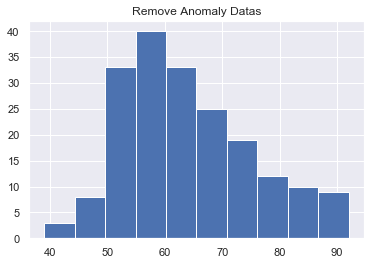

In [8]:
#データから異常値判定されたデータを抜いてグラフを描く
Y = X.drop(index= anomaly)
y = Y["weight"]
y.hist()
plt.title("Remove Anomaly Datas")

Text(0.5, 1.0, 'Anomaly Of Dates')

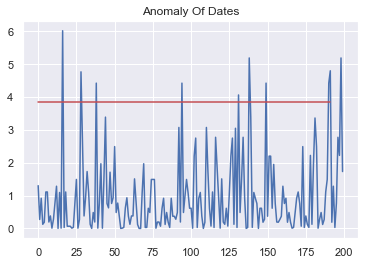

In [9]:
#異常値を抜いたデータに対してホテリング統計量を計算し、グラフを描く
#異常値を一度抜いても、異常値が発見できてしまう事が分かる。
a = hoteling_1dim(y)
plt.plot(a)
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")

In [10]:
#異常値のリストを確認する
anomaly = y[a>a_th].index
Y.loc[anomaly]

,sex,weight,height,repwt,repht
16,M,92,187,101.0,185.0
28,F,39,157,41.0,153.0
38,M,88,178,86.0,175.0
94,M,88,189,87.0,185.0
131,M,87,185,89.0,185.0
138,M,90,188,91.0,185.0
149,M,88,184,86.0,183.0
190,M,88,185,93.0,188.0
191,M,89,173,86.0,173.0
198,M,90,181,91.0,178.0


#ホテリング理論(多次元)

多次元のデータに対しても異常検知をしてみる。<br>
データはまたしてもDavis データを使う。

Text(0, 0.5, 'height')

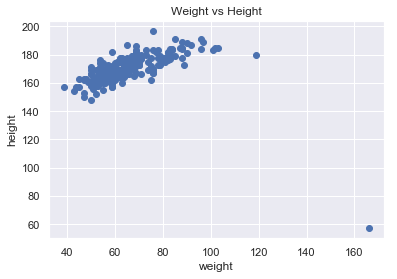

In [11]:
#Davis データのweight, height の値を使って異常検知してみる。
#まずはデータを読み込んでグラフを描く
target_path = os.path.join( os.getcwd(), "datas/Davis.csv")
X=pd.read_csv(target_path)

x= X[["weight", "height"]]
plt.scatter(x["weight"], x["height"])
plt.title("Weight vs Height")
plt.xlabel("weight")
plt.ylabel("height")


In [12]:
x.shape

(200, 2)

In [13]:
#ホテリング統計量を計算するための関数作成
def hoteling_Mdim(x):
    """データ数N, 次元Mのデータについて、ホテリング統計量a を計算する関数
    
    与えるデータx,平均μ, 分散σとして、 
    a= ((x-μ)/σ)^2で計算出来る

    Args:
        x : (N,M)型のnp.array

    Returns:
        a : データ毎のホテリング統計量
            (N,-)型のnp.array
    """
    mu = np.mean(x)
    N=x.shape[0]
    M=x.shape[1]
    Sig = np.dot((x-mu).T,(x-mu) )/N
    Sig_inv = np.linalg.inv(Sig)
    a = np.dot( np.dot((x-mu), Sig_inv), (x-mu).T ).diagonal()

    return a


In [14]:
#ホテリング統計量と、閾値を計算する
a = hoteling_Mdim(x)
a_th =stats.chi2.ppf(q=0.95, df=x.shape[1])
print(a_th)

5.991464547107979


Text(0, 0.5, 'Anomaly')

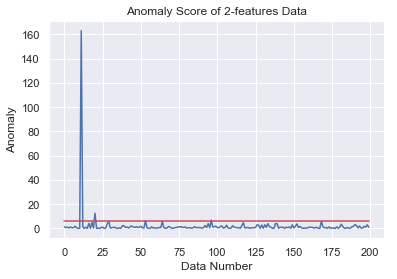

In [15]:
#グラフを描いて異常値を確認する
plt.plot(a)
plt.plot(a_th*np.ones(len(x)),c="r")
plt.title("Anomaly Score of 2-features Data")
plt.xlabel("Data Number")
plt.ylabel("Anomaly")

In [16]:
#どのデータが異常値か表示する
anomaly = x[a>a_th].index
X.loc[anomaly]

,sex,weight,height,repwt,repht
11,F,166,57,56.0,163.0
20,M,119,180,124.0,178.0
53,M,102,185,107.0,185.0
96,M,103,185,101.0,182.0
